# Predicting Heart failure

## The dataset

The dataset used in this projects was published to Kaggle by ... in 2020? and contains hospital data from xxx patients admitted to the xxx Hospital in Pakistan between XXX and XXX with cardiac symptoms.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Import data as .csv file

In [2]:
#Dataset imported from: https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital

HF_Dataset = 'HFDataset.csv'
HFdf_full = pd.read_csv(HF_Dataset, header=0)

For the purpose of this project, I have used a dataset downloaded from Kaggle as a .csv file to the Jupyter directory and uploaded to the local environement. Had I used a dataset from a different source, I could have used the source API to pull the dataset directly. As this is not the case here, I have included an unrelated example to showcase how I would go about accessing data using an API. I have pulled an interesting dataset using the Smart Dublin API: Fire and Ambulance Annual Incident Activity Log published by data.gov.ie


Initially used urllib library to download the file via the Smart Dublin API, however I discovered that this throws an error as Anaconda has replaced 'urllib' with 'requests'. I have imported the 'requests' library instead.

In [3]:
import requests
import pandas as pd

#define dataset url and 
url = "https://data.smartdublin.ie/api/3/action/datastore_search"
resource_id = "b9281d81-ccde-4c1e-b8db-b2b9f7e6eea8"
limit = 5

#Send get request, storing downloaded dataset as variable 'response'
response = requests.get(url, params={"resource_id": resource_id, "limit": limit})

#Extract 'results' and 'records' from the received .json file
data = response.json()
records = data["result"]["records"]

#Convert the resulting list into DataFrame for further analysis.
df2= pd.DataFrame(records)
print(df2.head())

   _id                 Date  Station Area   Description       TOC       ORD  \
0    1  2013-01-01T00:00:00   Rathfarnham     S/S OTHER  01:27:19  01:28:58   
1    2  2013-01-01T00:00:00      Tallaght      Fire CAR  01:49:57  01:50:40   
2    3  2013-01-01T00:00:00  North Strand       S/S RTA  03:35:24  03:36:14   
3    4  2013-01-01T00:00:00      Tallaght      Fire CAR  04:12:51  04:13:56   
4    5  2013-01-01T00:00:00       Finglas  Fire DOM PER  04:14:24  04:15:36   

        MOB        IA LS AH       MAV        CD  
0  01:30:47  01:58:54        01:59:02  02:05:05  
1  01:51:47  01:55:43        02:03:22  02:12:03  
2  03:38:28  03:41:20        03:59:44  04:21:07  
3  04:14:32  04:20:48        04:34:39  04:37:02  
4  04:17:37  04:20:47        04:27:30  04:33:51  


## Preliminary data analysis

In [4]:
#Use .head() method on our dataframe to take an exploratory look at what data in holds. 
print(HFdf_full.head())

   Age Age.Group  Gender Locality Marital status Life.Style Sleep Category  \
0   45     41-50  Female    RURAL        MARRIED         NO    NO     FREE   
1   51     51-60  Female    URBAN        MARRIED         NO    NO     FREE   
2   55     51-60  Female    RURAL        MARRIED        YES   YES     FREE   
3   55     51-60  Female    RURAL        MARRIED        YES   YES     FREE   
4   56     51-60  Female    RURAL        MARRIED        YES    NO     FREE   

  Depression Hyperlipi  ... oldpeak slope  ca  thal num SK  SK.React  \
0        YES       YES  ...     3.0     2   0     7   2  1        NO   
1        YES       YES  ...     1.2     2   0     7   2  1        NO   
2        YES       YES  ...     3.4     2   0     3   2  1        NO   
3        YES       YES  ...     2.0     2   1     7   3  1        NO   
4        YES       YES  ...     4.0     3   2     7   3  1        NO   

   Reaction  Mortality  Follow.Up  
0         0          0         60  
1         0          0    

In [5]:
#Use .info() method to get information on the type of data in the dataframe
print(HFdf_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Age.Group         368 non-null    object 
 2   Gender            368 non-null    object 
 3   Locality          368 non-null    object 
 4   Marital status    368 non-null    object 
 5   Life.Style        368 non-null    object 
 6   Sleep             368 non-null    object 
 7   Category          368 non-null    object 
 8   Depression        368 non-null    object 
 9   Hyperlipi         368 non-null    object 
 10  Smoking           368 non-null    object 
 11  Family.History    368 non-null    object 
 12  F.History         368 non-null    int64  
 13  Diabetes          368 non-null    int64  
 14  HTN               368 non-null    object 
 15  Allergies         368 non-null    object 
 16  BP                368 non-null    float64
 1

## Clean the Data

Not all columns are in this dataset are intuitive as to what their contained data represents. Without additional information on the dataset these columns do not provide any useful information and are dropped from further use.

In [6]:
# Drop 9 columns labled: "exang", "oldpeak", "slope", "ca", "thal", "num", "SK", "SK.React", and "Reaction" 
HFdf = HFdf_full.drop(columns = ["Life.Style", "Sleep", "Family.History", "Hypersensitivity", "exang", "oldpeak", "slope", "ca", "thal", "num", "SK", "SK.React", "Reaction"])

In [7]:
#Check for missing values
HFdf.isna()

,Age,Age.Group,Gender,Locality,Marital status,Category,Depression,Hyperlipi,Smoking,F.History,...,CO,Diagnosis,cp,trestbps,chol,fbs,restecg,thalach,Mortality,Follow.Up
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Count number of missing data points
HFdf.isna().sum()

Age               0
Age.Group         0
Gender            0
Locality          0
Marital status    0
Category          0
Depression        0
Hyperlipi         0
Smoking           0
F.History         0
Diabetes          0
HTN               0
Allergies         0
BP                0
Thrombolysis      0
BGR               0
B.Urea            0
S.Cr              0
S.Sodium          0
S.Potassium       0
S.Chloride        0
C.P.K             0
CK.MB             0
ESR               0
WBC               0
RBC               0
Hemoglobin        0
P.C.V             0
M.C.V             0
M.C.H             0
M.C.H.C           0
PLATELET_COUNT    0
NEUTROPHIL        0
LYMPHO            0
MONOCYTE          0
EOSINO            0
Others            0
CO                0
Diagnosis         0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
Mortality         0
Follow.Up         0
dtype: int64

In [9]:
HFdf.isnull().sum()

Age               0
Age.Group         0
Gender            0
Locality          0
Marital status    0
Category          0
Depression        0
Hyperlipi         0
Smoking           0
F.History         0
Diabetes          0
HTN               0
Allergies         0
BP                0
Thrombolysis      0
BGR               0
B.Urea            0
S.Cr              0
S.Sodium          0
S.Potassium       0
S.Chloride        0
C.P.K             0
CK.MB             0
ESR               0
WBC               0
RBC               0
Hemoglobin        0
P.C.V             0
M.C.V             0
M.C.H             0
M.C.H.C           0
PLATELET_COUNT    0
NEUTROPHIL        0
LYMPHO            0
MONOCYTE          0
EOSINO            0
Others            0
CO                0
Diagnosis         0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
Mortality         0
Follow.Up         0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

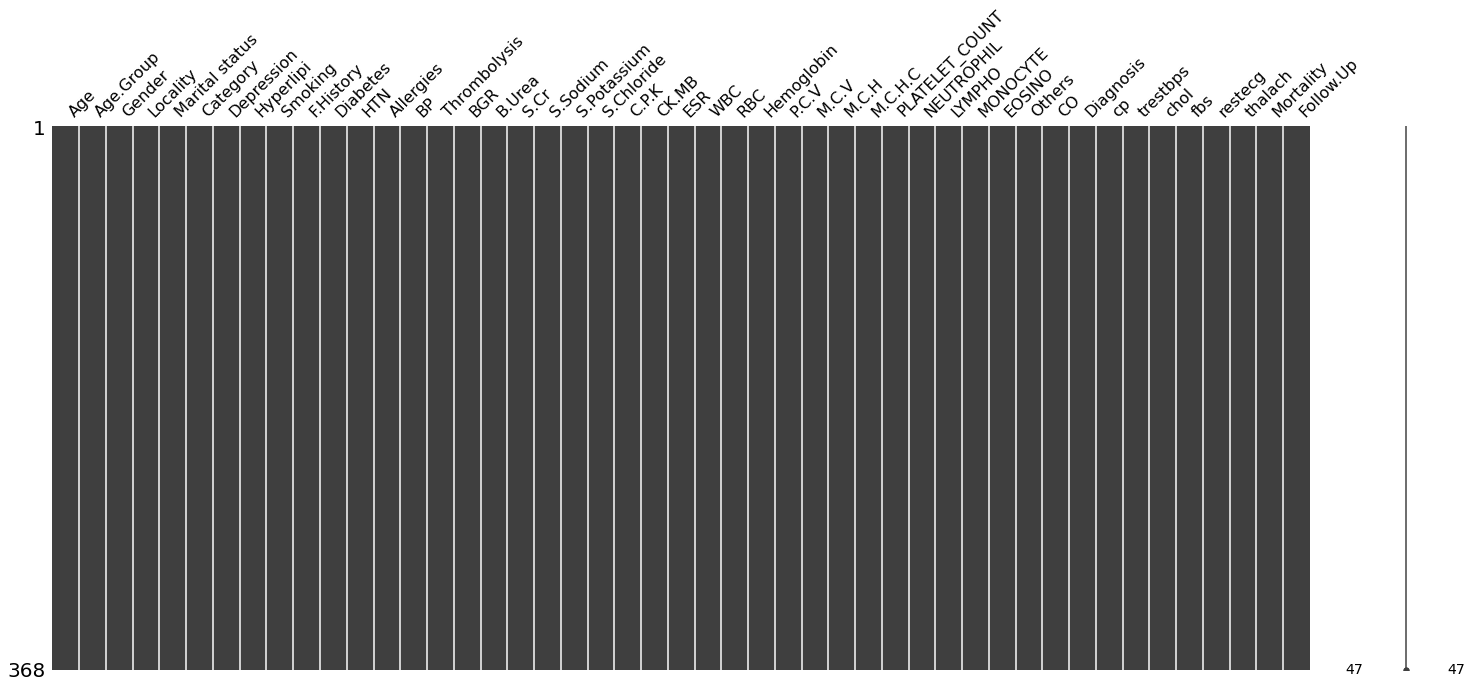

In [10]:
#Missing data points can be visualized in a matrix using the missingno package
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(HFdf)
plt.show

In an interesting quirk, the values in the "Diabetes" column are represented by integer 1 and 0 values, however these are inverted and non-intuitive (1 = absence of diabetes, 0 = diabetes diagnosis present). This can be confirmed in the dataset by calculating the mean blood sugar for all patients in the dataset grouped by whether they are identified as having diabetes.

In [11]:
#Sanity check on the Diabetes column
groupedDM = HFdf.groupby('Diabetes')['BGR'].mean()
print(groupedDM.head())

Diabetes
0    250.868687
1    184.029412
Name: BGR, dtype: float64


The mean blood sugar is infact higher in the group denoted by "0" in the Diabetes column, which would confirm the suspicion that values are counterintuitive. They need to be flipped so as to make sense in future data analysis.

In [12]:
#Simple for loop with lambda function to flip the values in the Diabetes column

for value in HFdf["Diabetes"]:
    HFdf["Diabetes"] = HFdf["Diabetes"].apply(lambda x: 1 if x == 0 else 0)
    print(HFdf["Diabetes"].head())
    #I added a break statement to exit the loop, otherwise it repeats on itself
    break

0    0
1    1
2    0
3    0
4    0
Name: Diabetes, dtype: int64


In [13]:
#---------------------------------------_TODO--------------------------
#----------------------------------------------------------------------
#Check for duplicates

#use WBC and BGR to filter for duplicate plts

The dataset is parsed into groups according to relevance and saved. This will promote ease of use down the line.

In [14]:
# As an alternative I can use a .groupby() method, however this would involve much more writing to pass /
# it as argument each individual column name, and would increase the possibility of errors.

#Extracted column titles as a list
titles = HFdf.columns.tolist()

In [15]:
#For ease-of use and referrence in the next I printed the index value associated with each column title
for index, item in enumerate(titles):
    print(f"{index}: {item}")

0: Age
1: Age.Group
2: Gender
3: Locality
4: Marital status
5: Category
6: Depression
7: Hyperlipi
8: Smoking
9: F.History
10: Diabetes
11: HTN
12: Allergies
13: BP
14: Thrombolysis
15: BGR
16: B.Urea
17: S.Cr
18: S.Sodium
19: S.Potassium
20: S.Chloride
21: C.P.K
22: CK.MB
23: ESR
24: WBC
25: RBC
26: Hemoglobin
27: P.C.V
28: M.C.V
29: M.C.H
30: M.C.H.C
31: PLATELET_COUNT
32: NEUTROPHIL
33: LYMPHO
34: MONOCYTE
35: EOSINO
36: Others
37: CO
38: Diagnosis
39: cp
40: trestbps
41: chol
42: fbs
43: restecg
44: thalach
45: Mortality
46: Follow.Up


In [47]:
#Dataframe containing demographics data
df_demog = HFdf.iloc[:, :6]

#Dataframe containing relevant past medical history data
df_pmhx = HFdf.iloc[:, 6:13]

#Dataframe containing laboratory results for blood work other than standard CBC
df_bloods_chem = HFdf.iloc[:, 15:24]

#Dataframe containing laboratory results for standard CBC blood work
df_bloods_cbc = HFdf.iloc[:, 24:36]

#Dataframe containing admissions symptom data
df_sxoa = HFdf.iloc[:, 38:45].join(HFdf.iloc[:, 13:15])

#Dataframe containing outcome data
df_outcome = HFdf.iloc[:, -2:]

Now that the dataframe is split into manageable related section, some data types need to be standardized. Some parameters are represented as a non-boolean discrete yes/no series, while others are integers. 


In [17]:
#Custom function to change yes/no object types to integers

def convert_to_int(original, to_convert):
    """Converts object type to integer over multiple columns 
    Args:
        original: dataframe containing columns of type to be converted
        to_convert: (list): list of columns over which the function is applied 
    """
    
    dict = {"YES": 1, "NO": 0}

    for column in to_convert:
        original[column] = original[column].replace(dict)
        print(original[column].head())

In [18]:
#List of columns with inappropriate data types to be converted to boolean
col_list_pmhx = ["Depression", "Hyperlipi", "Smoking", "HTN", "Allergies"]
#col_list_sxoa = ["Thrombolysis"]

#pass list along with data frame to custom function
convert_to_int(df_pmhx, col_list_pmhx)
#convert_to_int(df_sxoa, col_list_sxoa)

0    1
1    1
2    1
3    1
4    1
Name: Depression, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: Hyperlipi, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Smoking, dtype: int64
0    0
1    0
2    1
3    1
4    1
Name: HTN, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Allergies, dtype: int64


## Interpretation of columns with unique string data

Use ReGex to match string entries in columns containing data on symptoms present on admission ("CO") and established diagnosis ("Diagnosis")

This can also be done by passing a list of desired keywords as argument to an .str.contains() function which would iterate over the target column, returning a boolean series which can be appended as a new column. 

In this example, strings in the column over which the method iterates are first made lowercase.

In [19]:
#---------------------------------------_TODO--------------------------
#----------------------------------------------------------------------

In [20]:
df_lower = HFdf["CO"].str.lower()
Contains_CO = df_lower.str.contains("SWEATING")
Contains_CO.value_counts()

False    368
Name: CO, dtype: int64

In [21]:
#Can I make this a for loop?


#Use df[].unique() to determine all unique answers to “other”, “CO”, “Diagnosis”,
#Unique_other = HFdf["other"].unique()
Unique_CO = HFdf["CO"].unique()
Unique_Diagnosis = HFdf["Diagnosis"].unique()


In [22]:
import numpy as np
Col_unique_list = ["Others", "CO", "Diagnosis",]

for name in Col_unique_list:
    unique_content = HFdf[name].value_counts()
    print(unique_content)

no                                  201
HTN                                  53
HTN, DM                              19
PND, ORTHOPENIA                      16
ACS                                  10
DM                                   10
IHD, SOB                             10
IHD, HTN                              7
LV dysfunction                        7
CHB, RV INFARCT                       6
HCV, IHD                              6
ICMP WITH EF= 30%,PULMONAR ODEMA      6
ORTHOPENIA, PND                       6
SEIZARIAN, HYSTECTOMY.                5
IHD,DM                                2
PULMONARY ODEMA                       2
DM,M.I                                2
Name: Others, dtype: int64
Chest pain,                                      84
Chest pain, SWEATING                             23
Chest pain,vomiting, sweating                    17
SOB FROM 1 DAY                                   16
Chest pain, VOMITING                             16
CENTRAL Chest pain,              

In [23]:
#Use ReGex to filter for relevant keywords
Relevant_keywords_CO = pd.list["chest pain", "SOB"]
Relevant_keywords_Diagnosis = 
Relevant_keywords_other = 

SyntaxError: invalid syntax (<ipython-input-23-d6a9850555b0>, line 3)

Use ReGex to search freeform text column to match symptoms which were documented on admission.

In [ ]:
#Use ReGex to match specific symptoms: Chest pain 

#Convert data type from object to string
As_ser = HFdf["CO"]
As_str = As_ser.astype(str).str

#Make string lowercase
As_lowerc = As_str.lower()

# Create a new column called "CO_chest_pain" to store boolean value, True if symptom present, otherwise False
HFdf["CO_chest_pain"] = As_lowerc.str.contains(r"\w*\s?chest\s?pain\w*", regex=True)

#Count unique instances of chest pain as a presenting symptom
print(HFdf["CO_chest_pain"].value_counts())

In [ ]:
#Use ReGex to match specific symptoms - Sweating

In [ ]:
#Use ReGex to match specific symptoms - Nausea or Vomiting

In [ ]:
#Pull only rows which did not contain either of the three presenting symptomes found by ReGex 
# Save these rows of unique atypical presentations as HFdata_df["CO_unique_atypical"]

In [ ]:
#Histogram showing percentage of pts exhibiting most common symptoms - by age group, gender.

#Maybe put this lower in with Basic stat analysis...

Use ReGex to search column containing free-form string data on established diagnosis ("Diagnosis")

## Basic Statistical Analysis 

/Users/GBala/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


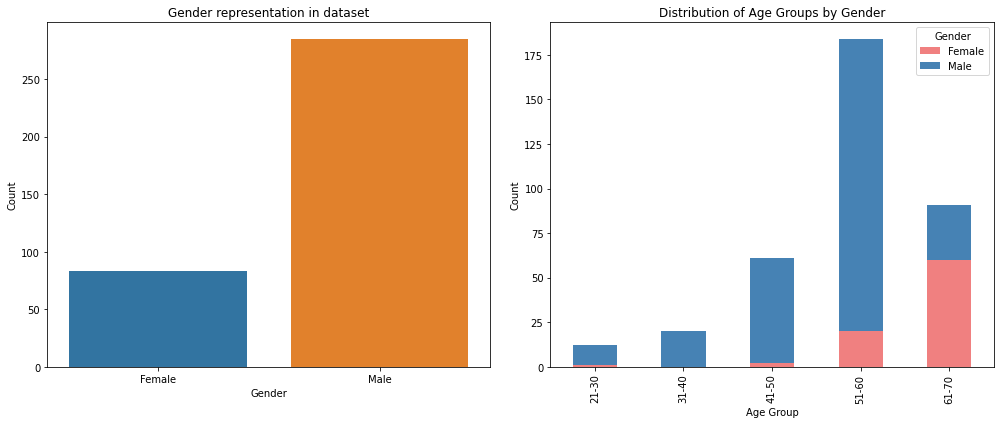

In [28]:
#Barchart showing breakdown of data by: Gender, and Age Group subgroup and gender

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.countplot(data=HFdf, x="Gender", ax=ax0)
ax0.set_xlabel("Gender")
ax0.set_ylabel("Count")
ax0.set_title("Gender representation in dataset")

age_group_order = ["21-30", "31-40", "41-50", "51-60", "61-70"]
grouped = HFdf.groupby(["Age.Group", "Gender"])
counts = grouped.size().unstack()
colours = ["lightcoral", "steelblue"]

counts.plot(kind="bar", stacked=True, color=colours, ax=ax1)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups by Gender")

plt.tight_layout(h_pad=2.0, w_pad=2.0)
plt.show()


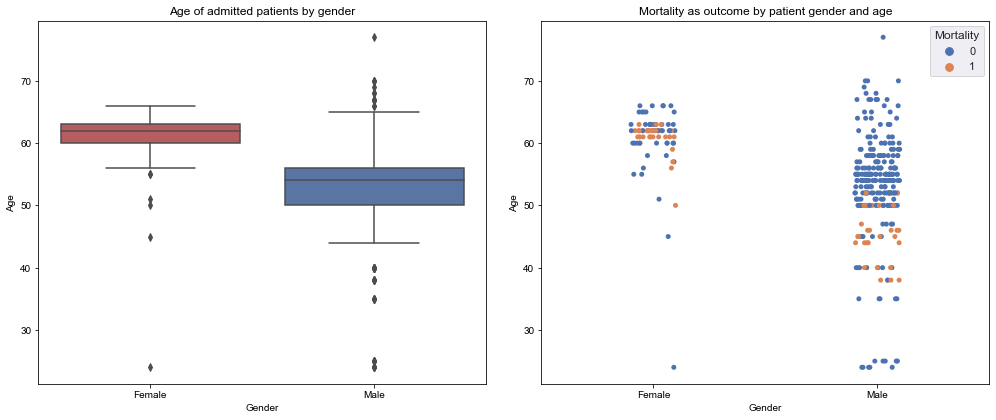

In [29]:
#Boxplot and stripplot showing breakdown of dataset for mortality by: Gender and Age

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.set()
colours = {"Female": "r", "Male":"b"}

sns.boxplot(data=HFdf, x="Gender", y="Age", palette=colours, ax=ax0)
ax0.set_title("Age of admitted patients by gender")

sns.stripplot(data=HFdf, x="Gender", y="Age", hue="Mortality", jitter=True, ax=ax1)
ax1.set_title("Mortality as outcome by patient gender and age")

plt.tight_layout(h_pad=2.0, w_pad=2.0)
plt.show()

In [30]:
#MOrtality by Age.Group and location

print(df_pmhx.head())

   Depression  Hyperlipi  Smoking  F.History  Diabetes  HTN  Allergies
0           1          1        0          0         0    0          0
1           1          1        0          0         1    0          0
2           1          1        0          0         0    1          0
3           1          1        0          0         0    1          0
4           1          1        0          0         0    1          0


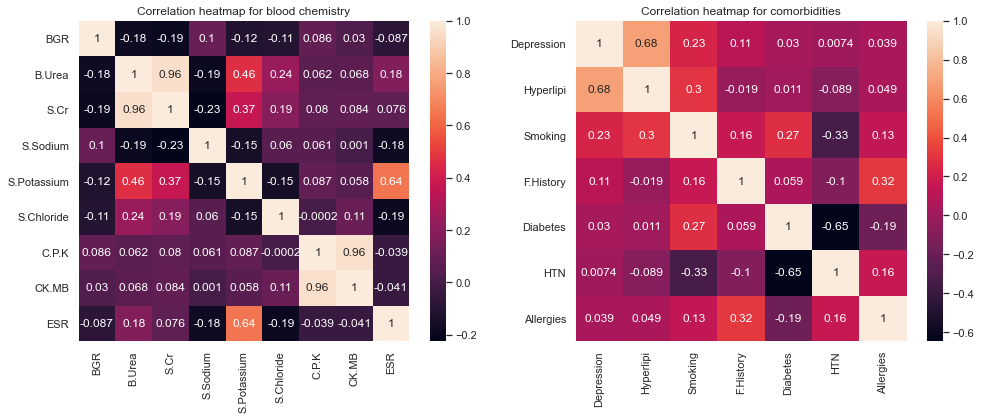

In [31]:
#Mortality hist? correlation? by comorbidity : Depression, Hyperlipidemia, Smoking, DM, HTN

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.set()

sns.heatmap(df_bloods_chem.corr(), annot=True, ax=ax0)
ax0.set_title("Correlation heatmap for blood chemistry")

sns.heatmap(df_pmhx.corr(), annot=True, ax=ax1)
ax1.set_title("Correlation heatmap for comorbidities")

plt.tight_layout(h_pad=2.0, w_pad=2.0)

plt.show()

#CK.MB corr with CPK - MI
#Cr corr with BUN and K - renal failure
#K corr with BUN and Cr - Renal failure 
#ESR corr with K - ??? myocardial injury?

#Lipids corr with Depression - meds?
#Smokign corr with lipids
#HTN not corr with smoking and DM 

It is interesting to note that Hypertenssion does not correlate with Smoking or Diabetes, two conditions that are known to be associated. A further sanity check of the HTN data should be done (similar to the sanity check done on the Diabetes column).

In [32]:
#Sanity check on the HTN column
groupedBP = HFdf.groupby('HTN')['BP'].mean()
groupedBPstd = HFdf.groupby('HTN')['BP'].std()
print(groupedBP.head())
print(groupedBPstd.head())

HTN
NO     122.672455
YES    120.000995
Name: BP, dtype: float64
HTN
NO     26.382701
YES    22.891328
Name: BP, dtype: float64


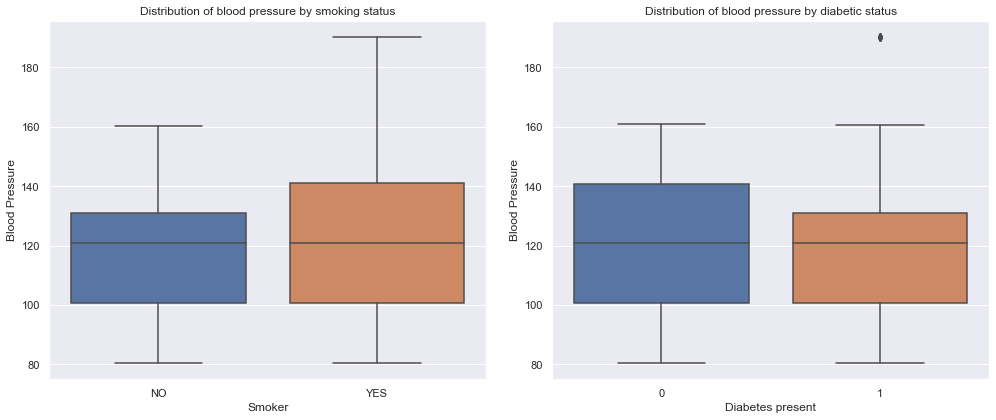

In [33]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.set()
colours = {"Smoking": "r", "Diabetes":"b"}

h= sns.boxplot(data=HFdf, x="Smoking", y="BP", ax=ax0)
h.set(xlabel="Smoker", ylabel="Blood Pressure")
ax0.set_title("Distribution of blood pressure by smoking status")

i = sns.boxplot(data=HFdf, x="Diabetes", y="BP", ax=ax1)
i.set(xlabel="Diabetes present", ylabel="Blood Pressure")
ax1.set_title("Distribution of blood pressure by diabetic status")


plt.tight_layout(h_pad=2.0, w_pad=2.0)
plt.show()

In [34]:
groupedBPquart = HFdf.groupby("HTN")["BP"].describe()
print(groupedBPquart)

     count        mean        std   min    25%    50%    75%     max
HTN                                                                 
NO   167.0  122.672455  26.382701  80.5  100.7  120.8  130.8  190.11
YES  201.0  120.000995  22.891328  80.5  100.7  120.8  140.7  160.90


Aditional analysis...

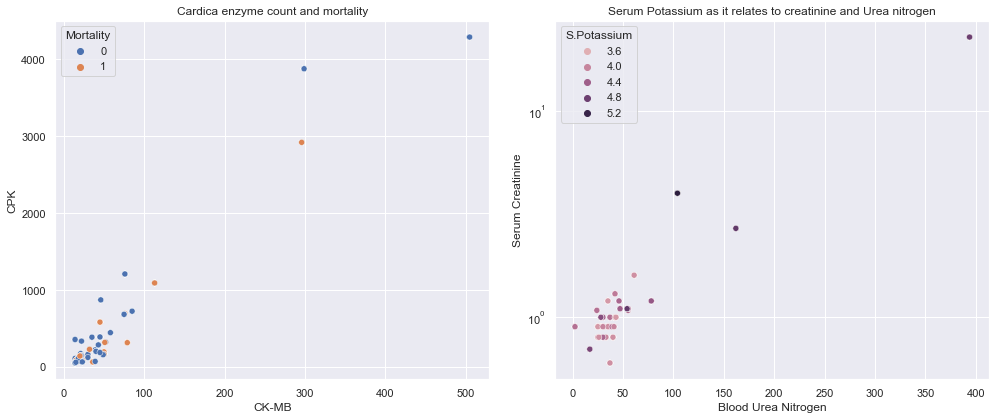

In [35]:
#Scatter: CKMB vs CPK hue = mortality
#Scatter: K and BUN hue = diabetes

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.set()

f = sns.scatterplot(data=HFdf, x="CK.MB", y="C.P.K", hue="Mortality", ax=ax0)
f.set(xlabel="CK-MB", ylabel="CPK")
ax0.set_title("Cardica enzyme count and mortality")

g = sns.scatterplot(data=HFdf, x="B.Urea", y="S.Cr", hue="S.Potassium", ax=ax1)
g.set_yscale("log")
g.set(xlabel="Blood Urea Nitrogen", ylabel="Serum Creatinine")
ax1.set_title("Serum Potassium as it relates to creatinine and Urea nitrogen")

plt.tight_layout(h_pad=2.0, w_pad=2.0)

plt.show()

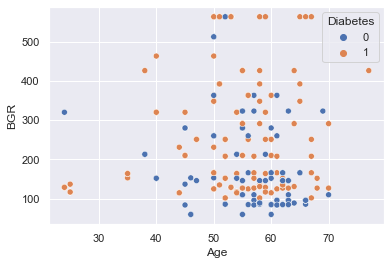

563
563    28
166    23
146    20
251    17
96     16
363    16
152    16
85     16
320    12
127    12
129    11
115    10
117    10
60     10
164    10
213    10
260    10
280    10
210    10
86      7
426     7
84      7
135     7
392     7
102     7
110     6
208     6
323     6
125     6
291     6
348     5
131     5
89      5
512     4
153     4
137     2
231     2
463     2
Name: BGR, dtype: int64


In [36]:
#INCQ with BG and hue=DM

sns.scatterplot(data=HFdf, x="Age", y="BGR", hue="Diabetes")
plt.show()

print(HFdf["BGR"].max())

print(HFdf["BGR"].value_counts())

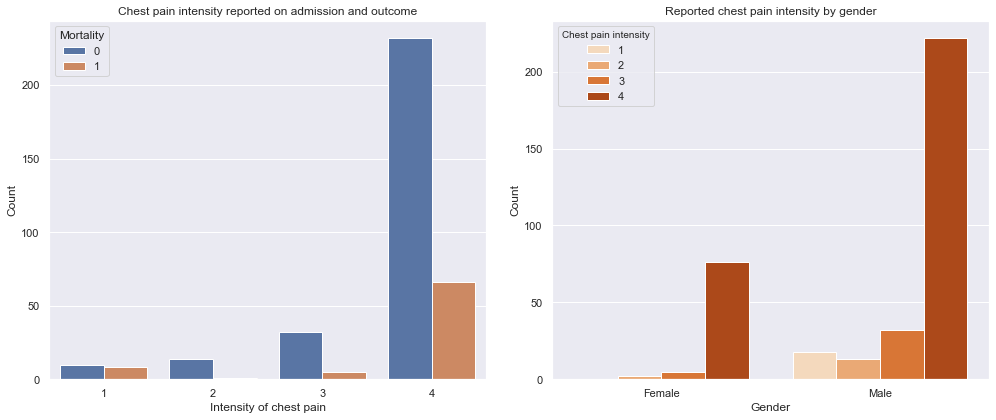

In [37]:
#Chest pain on presentation and by gender and mortality outcome

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.set()

i = sns.countplot(data=HFdf, x="cp", hue="Mortality", ax=ax0)
i.set_xlabel("Intensity of chest pain")
i.set_ylabel("Count")
ax0.set_title("Chest pain intensity reported on admission and outcome")

j = sns.countplot(data=HFdf, x="Gender", hue="cp", palette="Oranges", ax=ax1)
plt.legend(loc="upper left", labels=["1", "2", "3", "4"], title = "Chest pain intensity", title_fontsize = "10")
j.set_xlabel("Gender")
j.set_ylabel("Count")
ax1.set_title("Reported chest pain intensity by gender")

plt.tight_layout(h_pad=2.0, w_pad=2.0)
plt.show()


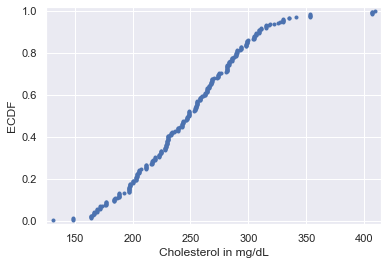

In [38]:

x = np.sort(HFdf["chol"])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle="none")
_ = plt.xlabel("Cholesterol in mg/dL")
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

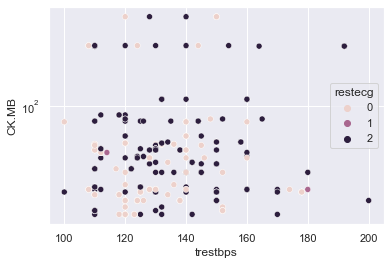

In [39]:
#chol bgr by mortality
sns.set()
k = sns.scatterplot(data=HFdf, x="trestbps", y="CK.MB", hue="restecg")
k.set_yscale("log")
#k.set(xlabel="Blood Urea Nitrogen", ylabel="Serum Creatinine")
ax1.set_title("Serum Potassium as it relates to creatinine and Urea nitrogen")
plt.show()

In [ ]:
#Cor :
    #BGR - chol - cp
    




#Correlation: Followup? - maybe

## Machine Learning

Using a supervised learning algorythm, 

In [ ]:
#Use clustering to determine correlation between age, cholesterol and mortality

In [48]:
#Define dataset to use

#X = HFdf.drop("Mortality", axis=1).values
X = df_bloods_chem.values
y = HFdf["Mortality"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [49]:
#Split data to get xy_train and xy_test
#Need X and Y... x as df_bloods_chem and y as Mortality

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)


In [51]:
#Ridge regression model

from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[-0.044195493904347405, -0.044230789435079076, -0.044420269337395624, -0.04400443422428579, -0.04126672430368661]


In [53]:
# Lasso regression model

from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[-0.043193169721473135, -0.009393192703002873, -0.011465514331366444, -0.018295339037946334, -0.022212966819380675]


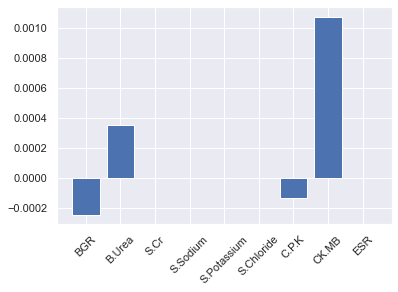

In [55]:
#Lasso model to highlight feature selection

names = df_bloods_chem.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

Hyperparameter tuning

In [ ]:
#